In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
arr = np.arange(0,256,1)
arr

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
arr = arr.reshape((16,16))
arr

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143],
       [144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159],
       [160, 161, 162, 163, 16

In [15]:
# convert into unsined 8 bit
arr_8 = arr.astype(np.uint8)

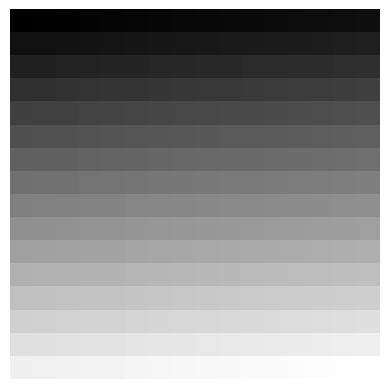

In [23]:
plt.imshow(arr_8,cmap="gray")
plt.axis("off")
plt.show()

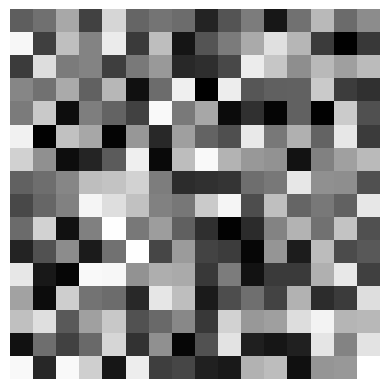

In [29]:
#random matrix (16*16)
arr1 = np.random.randint(0,255,size = (16,16),dtype=np.uint8)
plt.imshow(arr1,cmap="gray")
plt.axis("off")
plt.show()

## Face Detection

In [34]:
pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [3]:
import cv2

In [88]:
img = cv2.imread("boys.jpg")
cv2.imshow("image",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
#load haarcascade
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [92]:
# justtake a copy
# convert the image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# apply grayscale image into cascade
face_rect = haar.detectMultiScale(gray,1.2,5)
for x,y,w,h in face_rect:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

cv2.imshow("detected image",img)
cv2.waitKey()
cv2.destroyAllWindows()
    

In [94]:
print(face_rect)

[[236  20  99  99]
 [363 112  94  94]
 [ 49 131 100 100]]


# Real time vedio capture

In [9]:
vdo = cv2.VideoCapture("video.mp4")
while True:
    ret,frame = vdo.read()
    if ret == False:
        break
    image = frame.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# apply grayscale image into cascade
    face_rect = haar.detectMultiScale(gray,1.2,5)
    for x,y,w,h in face_rect:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),2)

    cv2.imshow("face detection",image)
    # cv2.imshow("frame",frame)
    if cv2.waitKey(1)==27:
        break
vdo.release()
cv2.destroyAllWindows()